<div style="display: flex; background-color: RGB(255, 255, 240);" >
<h1 style="margin: auto; padding: 30px; ">NETTOYAGE DES DONNEES DETECTION DE FAUX BILLETS </h1>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_selection import RFECV
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad, het_white, acorr_breusch_godfrey
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import joblib 
import warnings
warnings.filterwarnings("ignore")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargement du fichier</h3>
</div>

In [120]:
# Chemins des fichiers
billets = r"C:\Users\elodi\Desktop\Projet 13\DATA\billets.csv"

# Lecture des fichiers CSV
df = pd.read_csv(billets, sep=";")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.3 - Analyse exploratoire du fichier</h3>
</div>

In [123]:
#Afficher les dimensions des datasets
print("Le tableau billets comporte {} observation(s) ou article(s)".format(df.shape[0]))
print("Le tableau billets comporte {} colonne(s)".format(df.shape[1]))

Le tableau billets comporte 1500 observation(s) ou article(s)
Le tableau billets comporte 7 colonne(s)


In [125]:
#Vérification des types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [127]:
print("La variable margin_low compte",df.margin_low.isnull().sum(),"lignes avec des valeurs null !")

La variable margin_low compte 37 lignes avec des valeurs null !


In [129]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [131]:
# Aperçu des premières lignes
print(df.head()) 

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  


In [133]:
print(df["is_genuine"].value_counts())

is_genuine
True     1000
False     500
Name: count, dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.4 - Nettoyage des données</h3>
</div>

In [136]:
#Suppression des doublons
print('Nombre de doublons supprimés :',len(df) - len(df.drop_duplicates()))

Nombre de doublons supprimés : 0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.5 - Analyse exploratoire des données</h3>
</div>

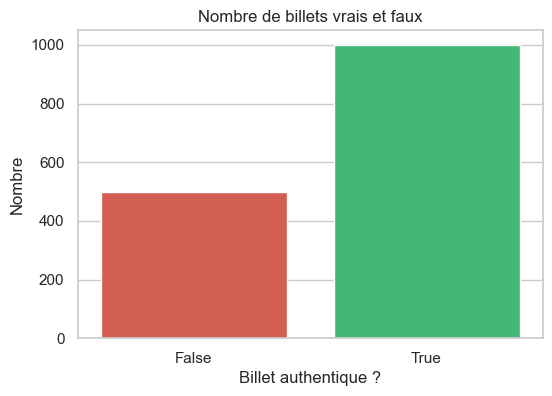

In [139]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_genuine', palette=["#e74c3c","#2ecc71"])
plt.title("Nombre de billets vrais et faux")
plt.xlabel("Billet authentique ?")
plt.ylabel("Nombre")
plt.show()

is_genuine
True     1000
False     500
Name: count, dtype: int64


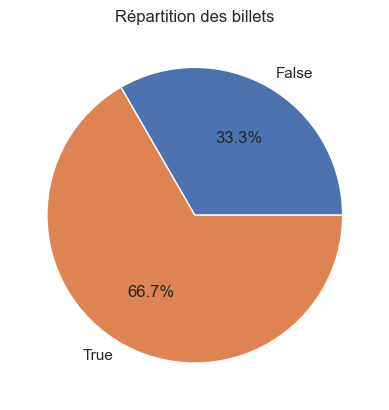

In [140]:
#nb de vrais et faux billets
Nb_vrai_faux = df['is_genuine'].value_counts()
print(Nb_vrai_faux)

#représentation graphique des proportions
plt.pie(df.groupby(["is_genuine"])["diagonal"].count(),
        labels=["False","True"],
        autopct="%1.1f%%")
#sns.axis("equal")
plt.title("Répartition des billets")
plt.show()

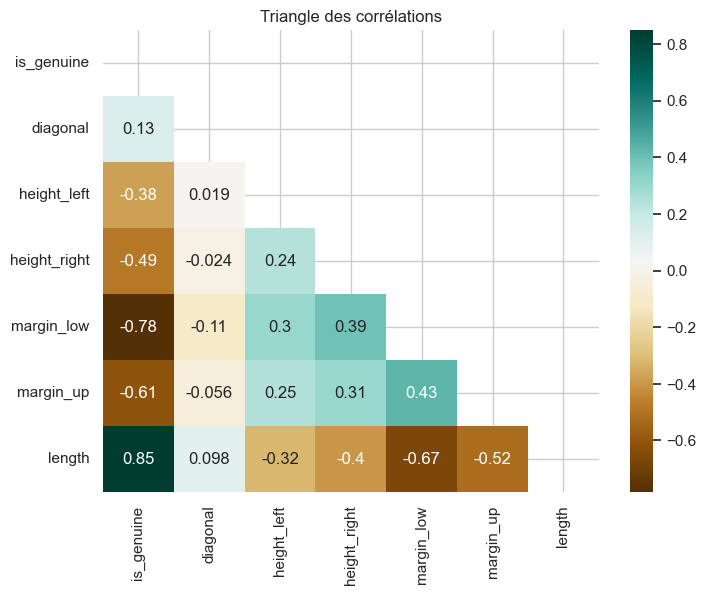

In [143]:
#Heatmap des corrélations
matrix = df.corr()
mask = np.triu(np.ones_like(matrix))
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, mask=mask, annot=True, cmap='BrBG')
plt.title('Triangle des corrélations')
plt.show()

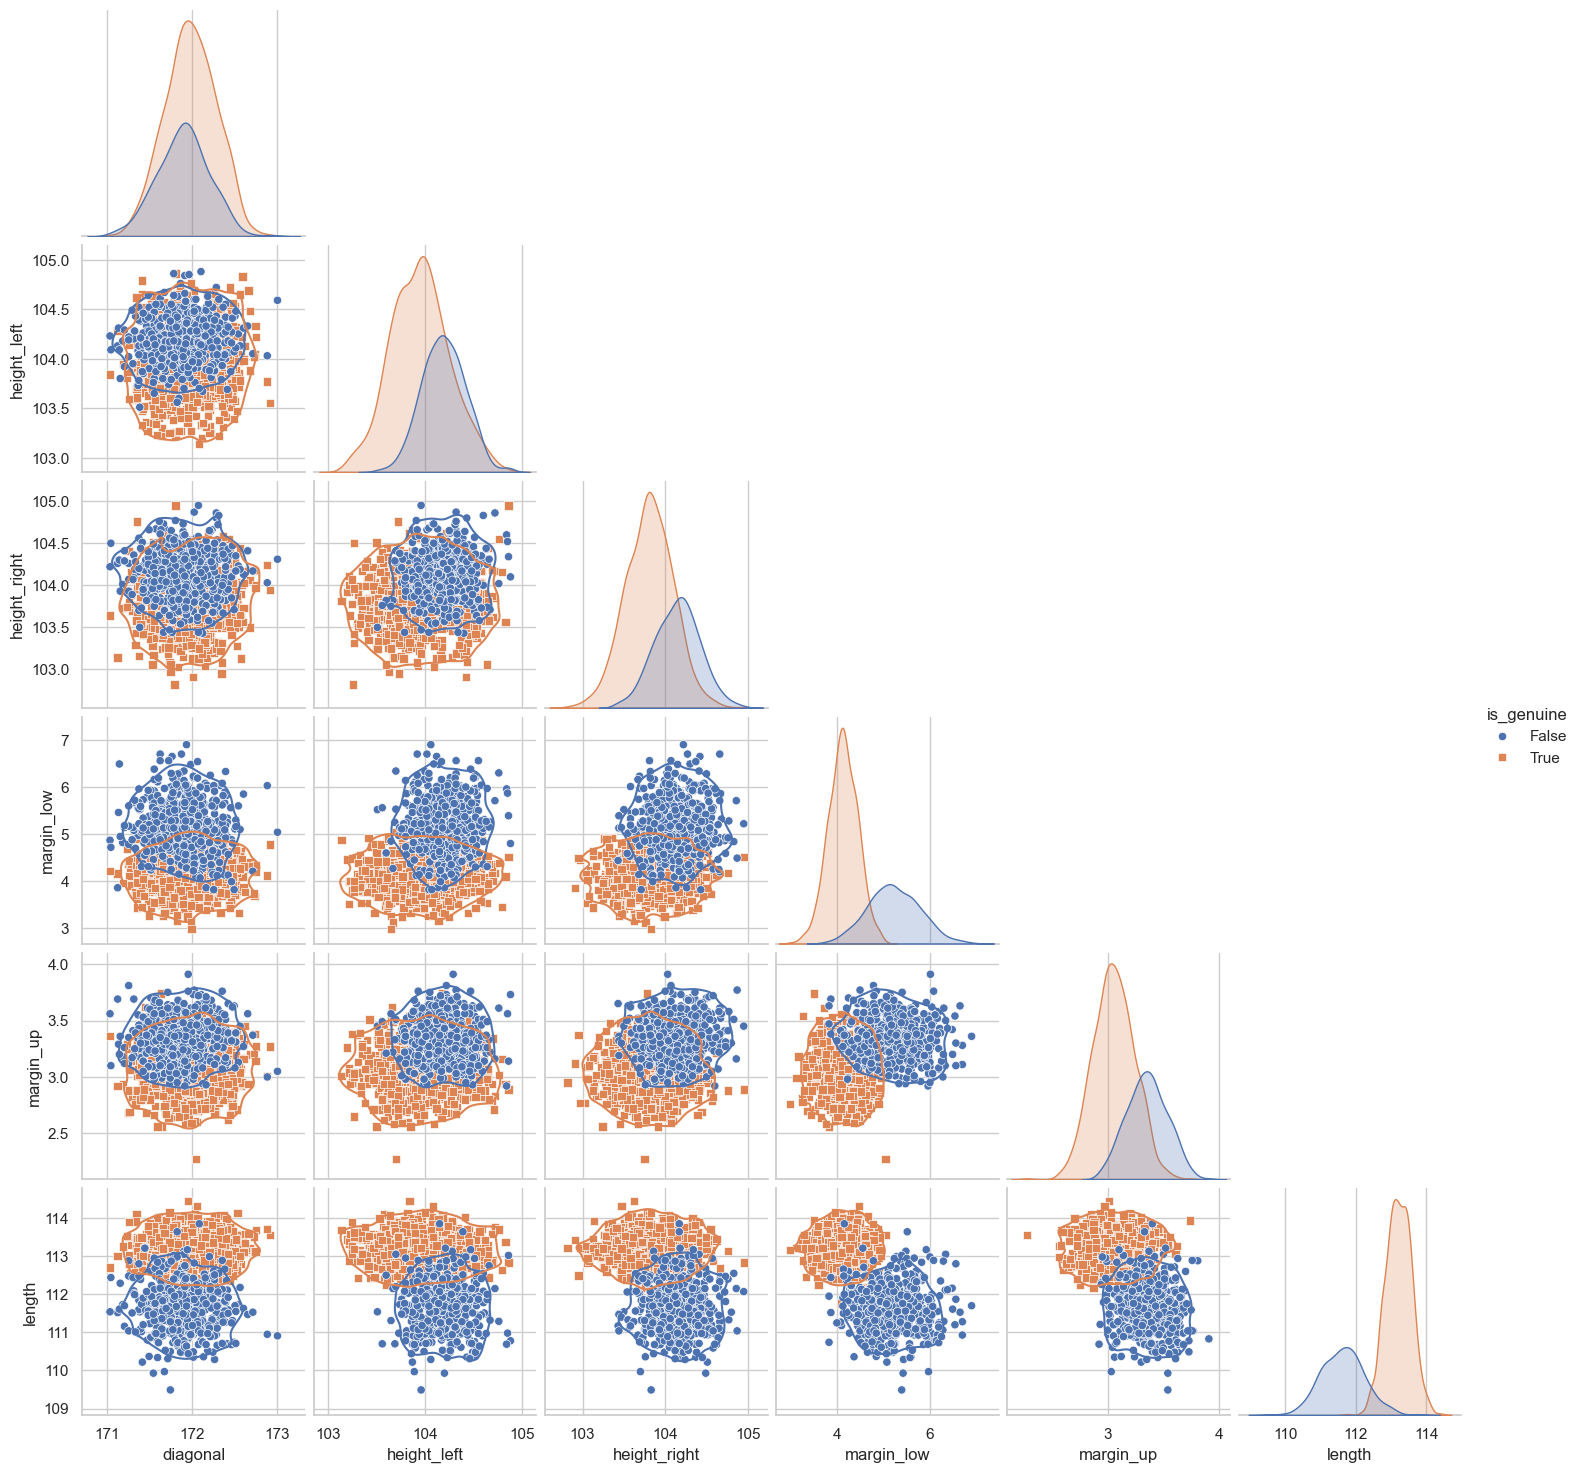

In [144]:
# Visualisation par nuage de points des différentes relations entre les variables
g = sns.pairplot(df, hue='is_genuine', markers=['o','s'], corner=True)
g.map_lower(sns.kdeplot, levels=2, color='.2')
plt.show()

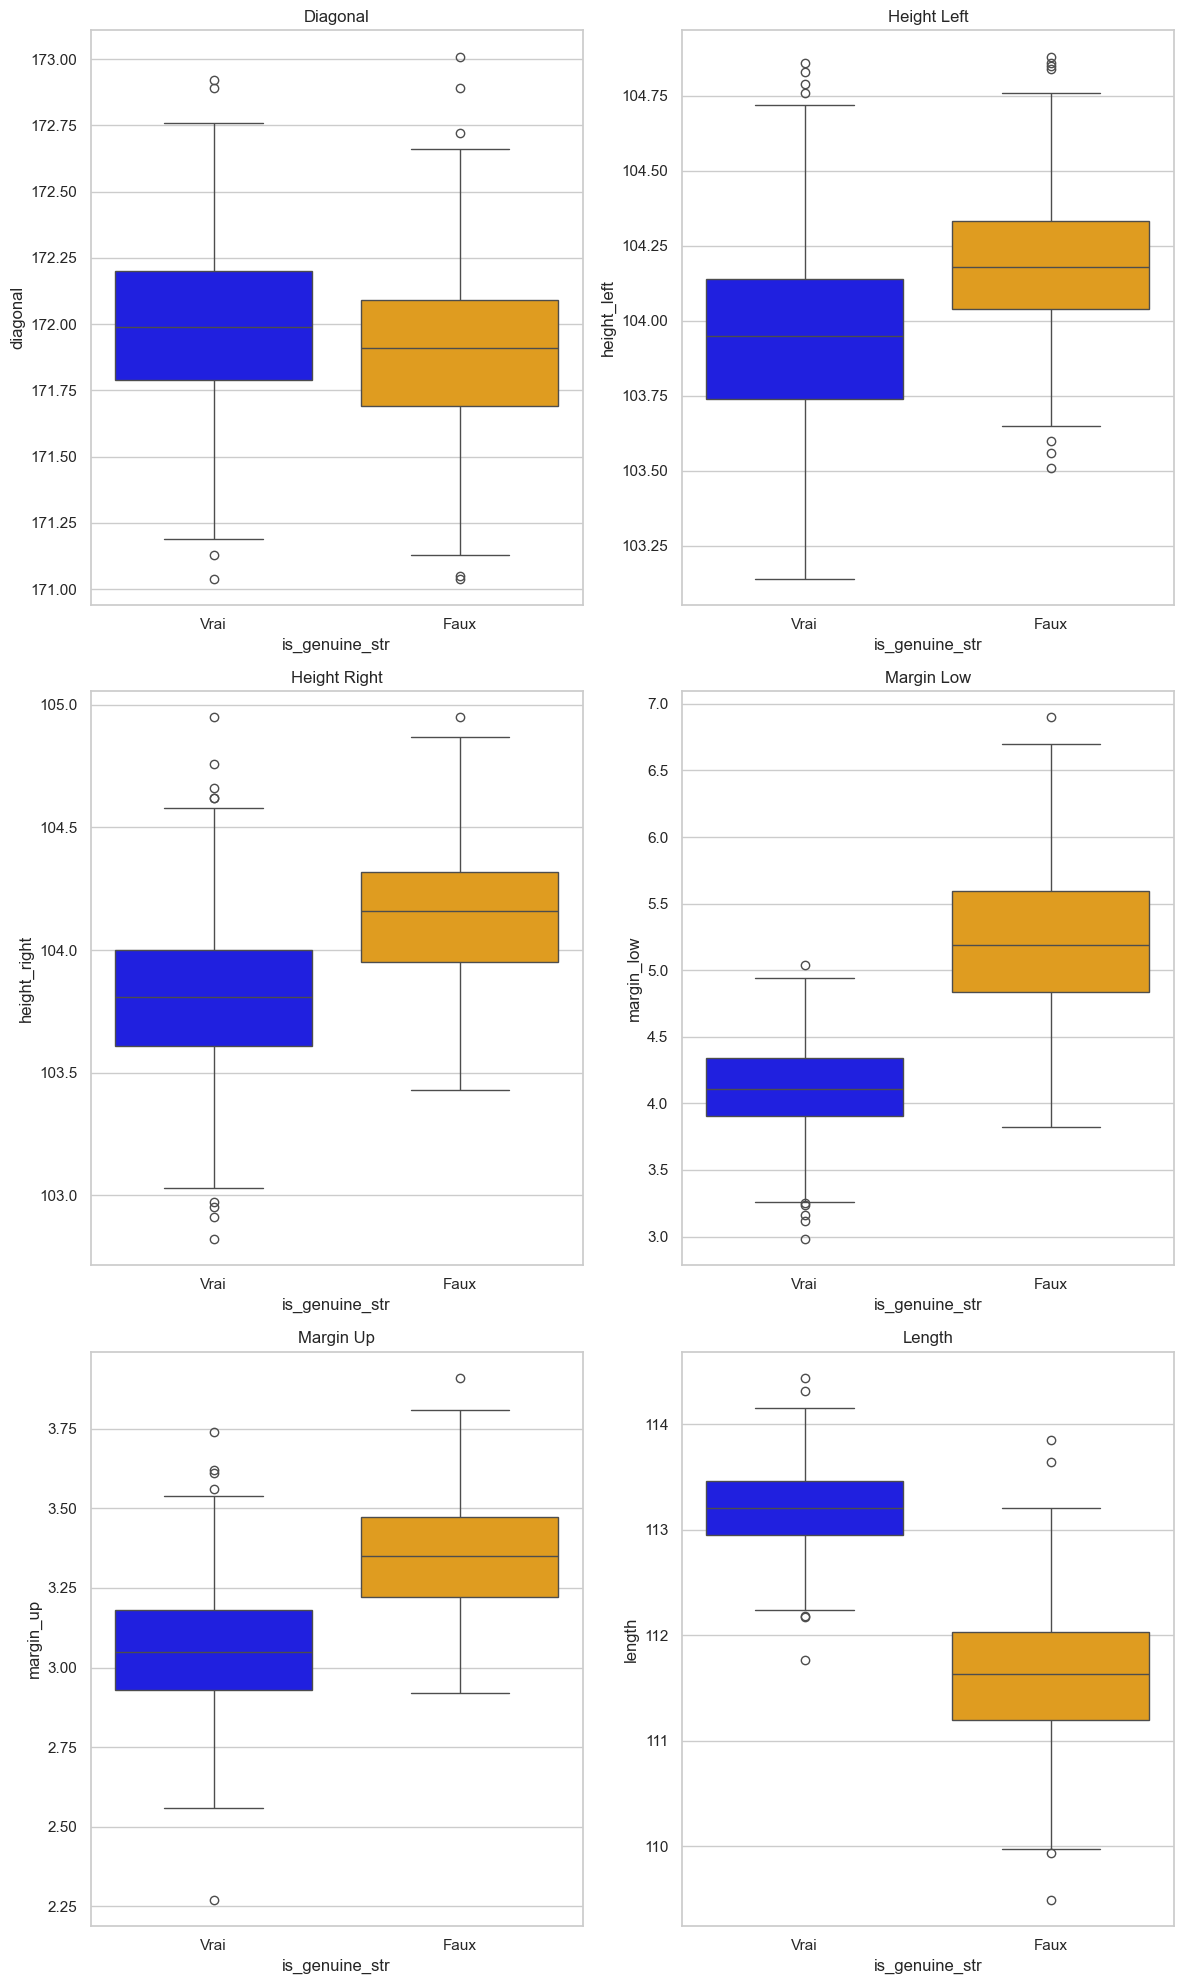

In [145]:
# Créer une copie de la colonne is_genuine en chaînes
df['is_genuine_str'] = df['is_genuine'].map({True: 'Vrai', False: 'Faux'})

plt.figure(figsize=(12, 20))
sns.set(style="whitegrid")

# Palette bleu/orange pour Vrai/Faux
palette = {'Vrai': 'blue', 'Faux': 'orange'}

plt.subplot(321)
sns.boxplot(data=df, x='is_genuine_str', y='diagonal', palette=palette)
plt.title('Diagonal')

plt.subplot(322)
sns.boxplot(data=df, x='is_genuine_str', y='height_left', palette=palette)
plt.title('Height Left')

plt.subplot(323)
sns.boxplot(data=df, x='is_genuine_str', y='height_right', palette=palette)
plt.title('Height Right')

plt.subplot(324)
sns.boxplot(data=df, x='is_genuine_str', y='margin_low', palette=palette)
plt.title('Margin Low')

plt.subplot(325)
sns.boxplot(data=df, x='is_genuine_str', y='margin_up', palette=palette)
plt.title('Margin Up')

plt.subplot(326)
sns.boxplot(data=df, x='is_genuine_str', y='length', palette=palette)
plt.title('Length')

plt.tight_layout()
plt.show()

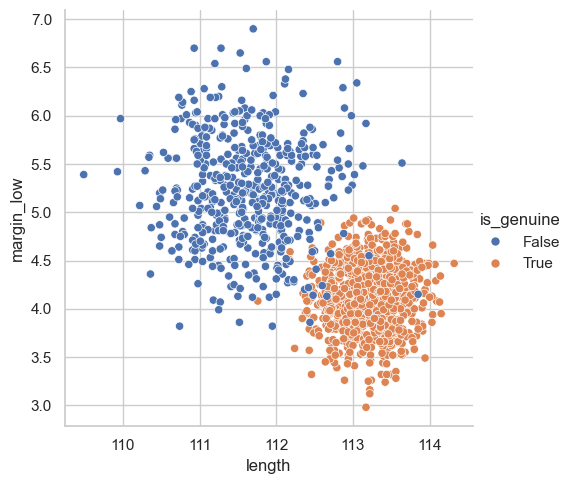

In [147]:
# Visualisation des vrais/faux billets sur 'margin_low' par rapport à 'length'

x = df['length']
y = df['margin_low']
z = df['is_genuine']

sns.relplot(x = x, y = y, hue= z)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.6 - Complétion variable manquante</h3>
</div>

In [149]:
#Regression linéaire simple
#Enlever les valeurs manquantes du df
df_full = df.dropna(inplace=False)

# Variable de prédiction, dataframe avec uniquement length
X = df_full[['length']]
# Variable a prédir, margin_low
y = df_full[['margin_low']]

# Crée un objet de régression linéaire, lr est la variable qui contient le modèle
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [150]:
#Tableau des valeurs prédites
y_pred = lr.predict(X)
#affichage des prédictions
y_pred

array([[4.40728129],
       [4.27549835],
       [4.24001833],
       ...,
       [4.85331586],
       [4.70125862],
       [4.79249296]])

In [151]:
# Coefficient de détermination R²
# y = (coef * X) + intercept
#Ordonnée d'origine
print('Constante :',lr.intercept_)
#pente de la droite de régression
print('Coef :', lr.coef_)
#Coefficient de détermination R2, plus la valeur est proche de 1, mieux c est
print('R² :',lr.score(X,y))

Constante : [61.59600862]
Coef : [[-0.50685746]]
R² : 0.4445592708293492


In [152]:
# Régression avec statsmodels (pour les tests)
X_sm = sm.add_constant(X)       # Ajout de la constante
slr = sm.OLS(y, X_sm).fit()     # Modèle OLS (Ordinary Least Squares)

In [153]:
# Test de significativité globale (F-test) 
f_pvalue = slr.f_pvalue
print("\nTest de significativité globale : p_value =", f_pvalue)


Test de significativité globale : p_value = 8.975567091008391e-189


In [154]:
print("\n=== Résumé statistique du modèle ===")
print(slr.summary())


=== Résumé statistique du modèle ===
                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     1169.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          8.98e-189
Time:                        13:33:36   Log-Likelihood:                -1045.8
No. Observations:                1463   AIC:                             2096.
Df Residuals:                    1461   BIC:                             2106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

In [155]:
# Test de significativité individuelle (t-test pour la variable 'length') 
t_values = slr.tvalues[1:]      # On ignore la constante
p_values = slr.pvalues[1:]
print("\nTest de significativité individuelle :")
print("t =", t_values.values[0], " | p_value =", p_values.values[0])


Test de significativité individuelle :
t = -34.1956672567766  | p_value = 8.97556709101609e-189


In [156]:
# Test de normalité des résidus (Anderson-Darling)
residuals = slr.resid
jb_value, jb_pvalue = normal_ad(residuals)
print("\nTest de normalité des résidus : p_value =", jb_pvalue)


Test de normalité des résidus : p_value = 3.9075068227166314e-13


In [157]:
# Test d’homoscédasticité (Breusch-Pagan)
bp_value, bp_pvalue, _, _ = het_breuschpagan(residuals, X_sm)
print("\nTest d’homoscédasticité : p_value =", bp_pvalue)


Test d’homoscédasticité : p_value = 5.996540571062651e-15


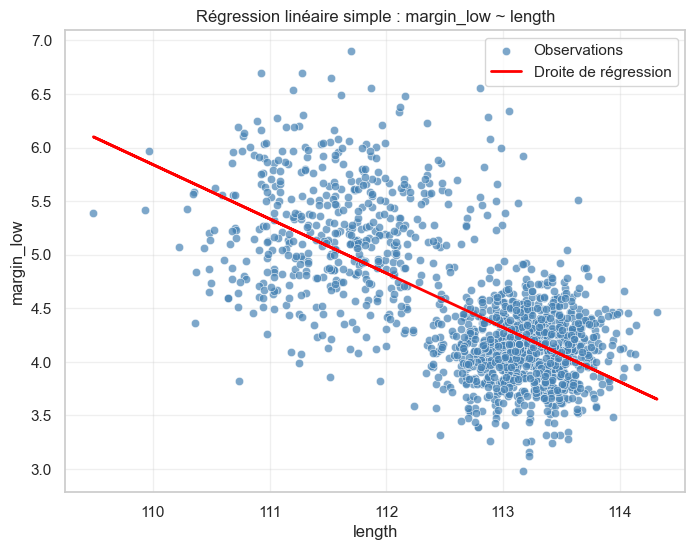

In [158]:
# Trie les valeurs pour tracer correctement la droite
X_sorted = np.sort(X.values.flatten())
y_pred_sorted = lr.predict(X_sorted.reshape(-1, 1))

# Nuage de points + droite de régression 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='length', y='margin_low', data=df_full, color='steelblue', alpha=0.7, label='Observations')

# Ligne de régression
plt.plot(X, y_pred, color='red', linewidth=2, label='Droite de régression')

plt.title("Régression linéaire simple : margin_low ~ length")
plt.xlabel("length")
plt.ylabel("margin_low")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

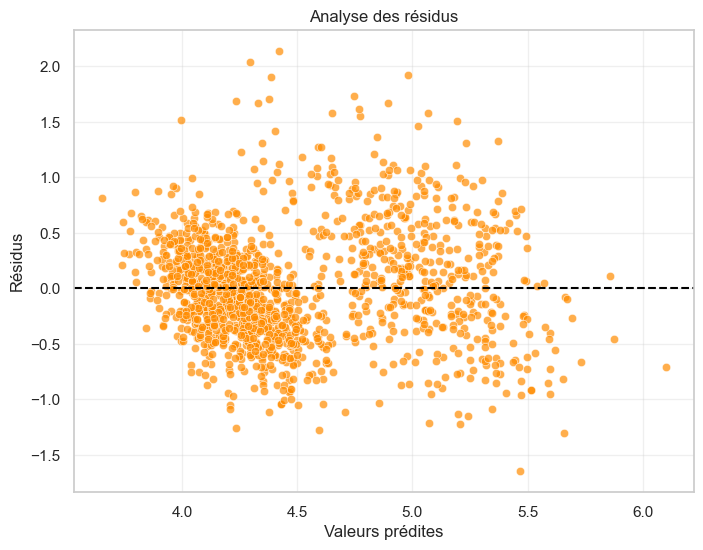

In [159]:
# Graphique des résidus
residuals = slr.resid  # résidus du modèle statsmodels
y_pred_sm = slr.predict(X_sm)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_sm, y=residuals, color='darkorange', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Analyse des résidus")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.grid(alpha=0.3)
plt.show()

In [160]:
#Colinéarité des variables

# Sélection des variables explicatives
X = df_full[['length', 'margin_up', 'margin_low','height_right','height_left','diagonal']]  

# Ajouter la constante pour statsmodels
X_sm = sm.add_constant(X)

# Calcul du VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]

print(vif_data)


       Variable            VIF
0         const  592495.682281
1        length       2.131067
2     margin_up       1.419672
3    margin_low       1.913278
4  height_right       1.260286
5   height_left       1.151474
6      diagonal       1.018610


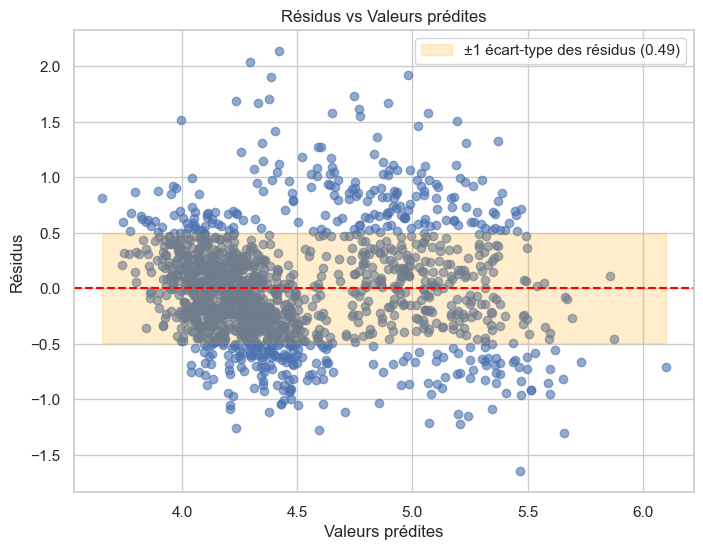

In [161]:
# Valeurs prédites
y_pred = slr.fittedvalues

# Résidus
residuals = slr.resid

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # ligne zéro

# Ajouter une "bande" représentant l'écart type des résidus
std_resid = np.std(residuals)
plt.fill_between(
    x=np.linspace(min(y_pred), max(y_pred), 100),
    y1=-std_resid,
    y2=std_resid,
    color='orange',
    alpha=0.2,
    label=f"±1 écart-type des résidus ({std_resid:.2f})"
)

plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Résidus vs Valeurs prédites")
plt.legend()
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.6 - Validation croisée et tests</h3>
</div>

In [163]:
# Vérifier combien de lignes ont des NaN dans margin_low
print("Nombre de lignes avec margin_low manquant :", df['margin_low'].isna().sum())

# Supprimer ces lignes
df_clean = df.dropna(subset=['margin_low'])

# Vérifier la suppression
print("Taille avant nettoyage :", df.shape)
print("Taille après suppression des NaN :", df_clean.shape)


Nombre de lignes avec margin_low manquant : 37
Taille avant nettoyage : (1500, 8)
Taille après suppression des NaN : (1463, 8)


In [164]:
# --- 1. Définir X et y à partir de df_clean ---
X = df_clean[['length']]                  # Variable explicative finale
y = np.ravel(df_clean[['margin_low']])    # Variable cible 1D

# Ajouter la constante pour statsmodels
X_sm = sm.add_constant(X)

# --- 2. Validation croisée (KFold) sur df_clean ---
from sklearn.model_selection import KFold
r2_scores = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, test_idx in kf.split(X_sm):
    X_train, X_test = X_sm.iloc[train_idx], X_sm.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)

    ss_res = np.sum((y_test - y_pred)**2)
    ss_tot = np.sum((y_test - np.mean(y_test))**2)
    r2 = 1 - ss_res/ss_tot
    r2_scores.append(r2)

print("\n=== VALIDATION CROISÉE (df_clean) ===")
print("R² par fold :", np.round(r2_scores, 3))
print("R² moyen :", np.mean(r2_scores).round(3))
print("Écart-type des R² :", np.std(r2_scores).round(3))




=== VALIDATION CROISÉE (df_clean) ===
R² par fold : [0.514 0.338 0.442 0.461 0.453]
R² moyen : 0.442
Écart-type des R² : 0.057


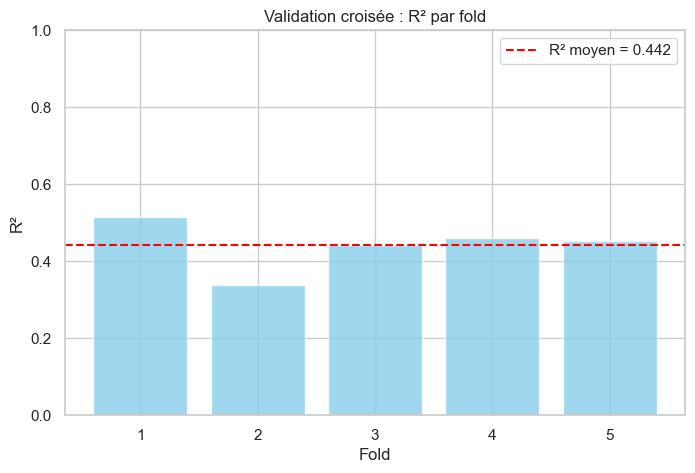

In [165]:
# R² obtenus par fold
r2_scores = [0.514, 0.338, 0.442, 0.461, 0.453]

plt.figure(figsize=(8,5))
plt.bar(np.arange(1, len(r2_scores)+1), r2_scores, color='skyblue', alpha=0.8)
plt.ylim(0,1)
plt.xlabel("Fold")
plt.ylabel("R²")
plt.title("Validation croisée : R² par fold")
plt.axhline(y=np.mean(r2_scores), color='red', linestyle='--', label=f"R² moyen = {np.mean(r2_scores):.3f}")
plt.xticks(np.arange(1, len(r2_scores)+1))
plt.legend()
plt.show()



In [166]:
# Exporter df_clean pour l'utiliser en R
df_clean.to_csv("df_clean.csv", index=False)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.6 - Modèles de prédiction, analyse de Performance</h3>
</div>

In [168]:
# Ceci corrige l'erreur de nom de colonne si l'utilisateur en laisse une avec un espace accidentel.
df_clean.columns = df_clean.columns.str.strip() 

In [169]:
# 1. Définition des variables (X et Y)
FEATURES = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
X = df_clean[FEATURES] 

In [170]:
# Conversion explicite : True (Vrai) -> 0 ; False (Faux) -> 1 (FAUX Billet est la cible d'intérêt)
y = df_clean['is_genuine'].map({True: 0, False: 1}) 

In [171]:
# 2. Séparation Train/Test (Stratifiée et Fixée pour la reproductibilité)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, # FIXE LA SÉPARATION
    stratify=y  
)

In [172]:
# 3. Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [173]:
# A. Régression Logistique (random_state=42 pour la stabilité)
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)
y_pred_lr = logreg_model.predict(X_test_scaled)

print("--- Résultats Régression Logistique ---")
print(classification_report(y_test, y_pred_lr, target_names=['VRAI (0)', 'FAUX (1)']))


--- Résultats Régression Logistique ---
              precision    recall  f1-score   support

    VRAI (0)       0.99      1.00      0.99       291
    FAUX (1)       1.00      0.97      0.99       148

    accuracy                           0.99       439
   macro avg       0.99      0.99      0.99       439
weighted avg       0.99      0.99      0.99       439



In [174]:
# B. k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print("\n--- Résultats k-NN ---")
print(classification_report(y_test, y_pred_knn, target_names=['VRAI (0)', 'FAUX (1)']))


--- Résultats k-NN ---
              precision    recall  f1-score   support

    VRAI (0)       0.99      1.00      0.99       291
    FAUX (1)       1.00      0.97      0.99       148

    accuracy                           0.99       439
   macro avg       0.99      0.99      0.99       439
weighted avg       0.99      0.99      0.99       439



In [175]:
# C. Random Forest (Le modèle final : corrigé pour le déséquilibre de classe)
# class_weight='balanced' force le modèle à mieux détecter la classe minoritaire (FAUX).
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train) 
y_pred_rf = rf_model.predict(X_test_scaled)

print("\n--- Résultats Random Forest ---")
print(classification_report(y_test, y_pred_rf, target_names=['VRAI (0)', 'FAUX (1)']))



--- Résultats Random Forest ---
              precision    recall  f1-score   support

    VRAI (0)       0.99      1.00      0.99       291
    FAUX (1)       0.99      0.97      0.98       148

    accuracy                           0.99       439
   macro avg       0.99      0.98      0.99       439
weighted avg       0.99      0.99      0.99       439



In [176]:
# --- SAUVEGARDE DU MEILLEUR MODÈLE ET DU SCALER ---
joblib.dump(rf_model, 'modele_random_forest_final.joblib')
joblib.dump(scaler, 'scaler_standard.joblib')
print("\n✅ Modèle Random Forest et Scaler sauvegardés pour le script de detection.")



✅ Modèle Random Forest et Scaler sauvegardés pour le script de detection.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.7 - Analyse non supervisée - K Means</h3>
</div>

In [178]:
# Utiliser les données d'entraînement scalées X_train_scaled
inertia = []
K_range = range(1, 10)
features = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length'] # Rappel des variables

for k in K_range:
    # n_init=10 assure de multiples initialisations pour trouver le meilleur résultat
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

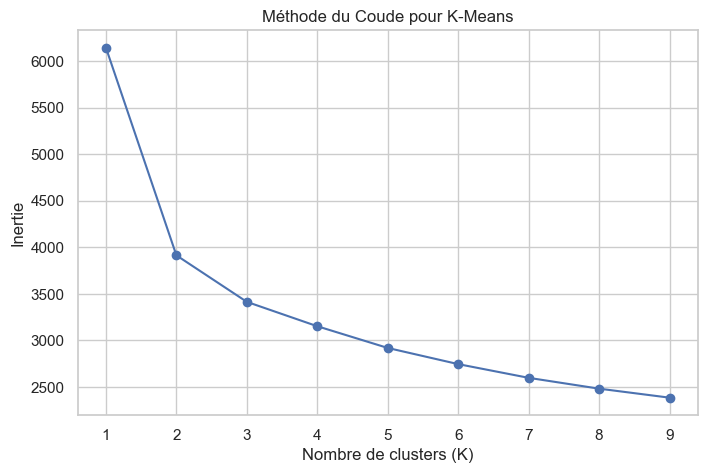

In [179]:
# Affichage de la courbe d'inertie
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Méthode du Coude pour K-Means")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()

In [180]:
# Entraînement du modèle K-Means avec K=2
kmeans_model = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_model.fit(X_train_scaled)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [181]:
# 2. Réduction de dimension avec l'ACP
pca = PCA(n_components=2)
# Fitter et transformer le jeu d'entraînement scalé
X_pca = pca.fit_transform(X_train_scaled)

In [182]:
# 3. Récupérer les labels de cluster
labels = kmeans_model.labels_

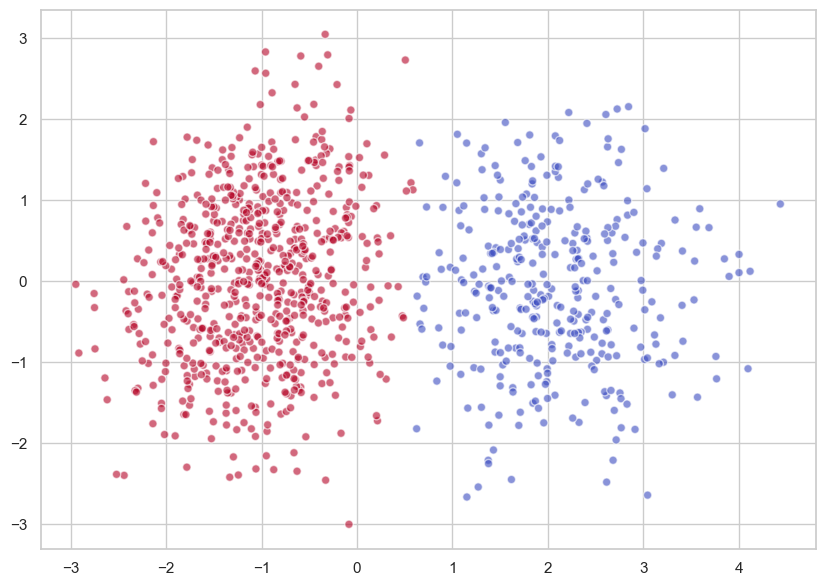

In [183]:
# 4. Création du graphique de dispersion
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    c=labels, 
    cmap='coolwarm', 
    alpha=0.6, 
    edgecolors='w'
)

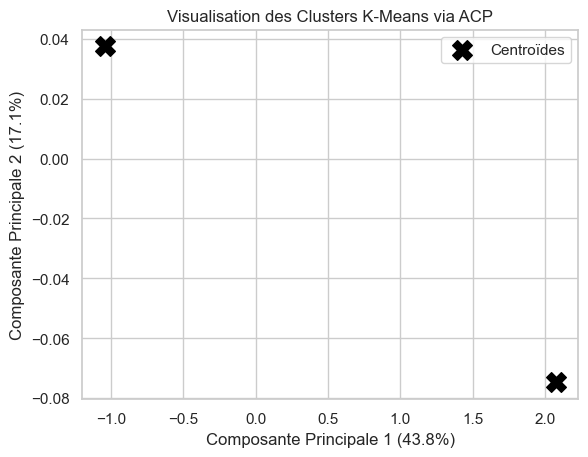

In [184]:
# 5. Ajout des centroïdes projetés (pour mieux voir le centre de chaque groupe)
centroids_pca = pca.transform(kmeans_model.cluster_centers_)
plt.scatter(
    centroids_pca[:, 0], 
    centroids_pca[:, 1], 
    marker='X', 
    s=200, 
    color='black', 
    label='Centroïdes'
)

plt.title("Visualisation des Clusters K-Means via ACP")
plt.xlabel(f"Composante Principale 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"Composante Principale 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend()
plt.grid(True)
plt.show()

In [185]:
# Prédiction des clusters sur le jeu de test scalé
clusters = kmeans_model.predict(X_test_scaled)

In [186]:
# Comparaison des clusters prédits avec les vrais labels y_test
print("\n--- Matrice de Confusion K-Means vs Labels Réels ---")
print(confusion_matrix(y_test, clusters))


--- Matrice de Confusion K-Means vs Labels Réels ---
[[  2 289]
 [141   7]]


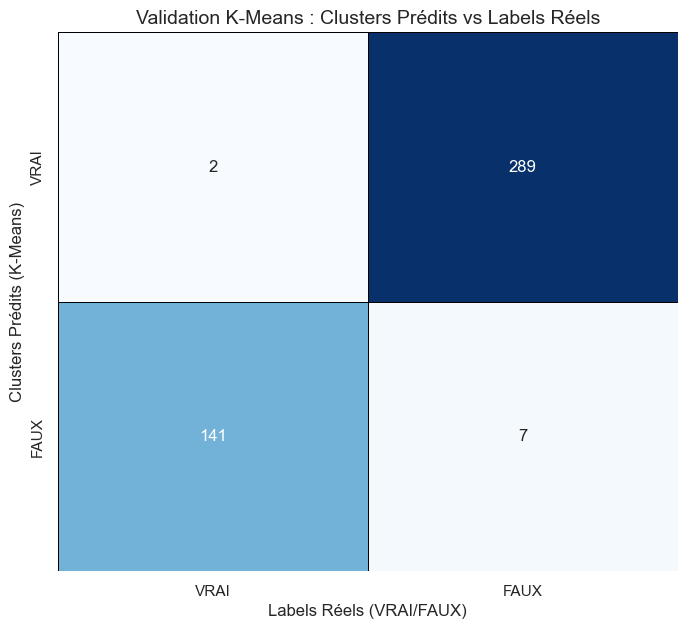

In [187]:
matrice_confusion = confusion_matrix(y_test, clusters)

# Définition des Étiquettes 

labels_visu = ['VRAI', 'FAUX']

# --- 3. Création du Graphique (Heatmap) ---
plt.figure(figsize=(8, 7))
sns.heatmap(
    matrice_confusion,
    annot=True,              # Afficher les valeurs numériques (le compte)
    fmt="d",                 # Formater les nombres en entier
    cmap="Blues",            # Choisir une palette de couleurs
    cbar=False,              # Masquer la barre de couleur
    linewidths=0.5,
    linecolor='black',
    yticklabels=labels_visu,
    xticklabels=labels_visu
)

# --- 4. Titres et Légendes ---
plt.title('Validation K-Means : Clusters Prédits vs Labels Réels', fontsize=14)
plt.xlabel('Labels Réels (VRAI/FAUX)', fontsize=12)
plt.ylabel('Clusters Prédits (K-Means)', fontsize=12)

plt.show()

In [188]:
# Caractérisation des centroïdes (Pour le rapport : comparer les moyennes des deux groupes)
print("\n--- Centroïdes des Clusters (Données Scalées) ---")
centroids_scaled = pd.DataFrame(kmeans_model.cluster_centers_, columns=features)
print(centroids_scaled)


--- Centroïdes des Clusters (Données Scalées) ---
   diagonal  height_left  height_right  margin_low  margin_up    length
0 -0.221669     0.548138      0.727679    1.118632   0.889359 -1.192385
1  0.111160    -0.274873     -0.364907   -0.560956  -0.445983  0.597941


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.8 - Test de la fonction sur XTest</h3>
</div>

In [212]:
def tester_avec_dataframe(df_a_tester, scaler_obj, model_obj):
    """
    Charge un DataFrame, applique le nettoyage et fait la prédiction 
    en utilisant les objets scaler et modèle passés en arguments.
    """
    df_raw = df_a_tester.copy()
    print(f"INFO : Début du processus de prédiction sur {len(df_raw)} lignes.")
    
    # 1. Nettoyage (suppression des NaN, comme pour l'entraînement)
    # Assurez-vous que la variable globale FEATURES est définie
    if 'FEATURES' in globals():
        colonnes_a_verifier = FEATURES
    else:
        colonnes_a_verifier = df_raw.columns

    df_clean_pour_pred = df_raw.dropna(subset=colonnes_a_verifier).copy()
    
    # ... (le reste du code de nettoyage est inchangé) ...
    
    X_pred = df_clean_pour_pred[colonnes_a_verifier]
    
    # 2. Mise à l'échelle des données de test
    # UTILISATION DIRECTE DE L'OBJET PASSÉ EN ARGUMENT
    X_pred_array = scaler_obj.transform(X_pred) 
    
    X_pred_scaled_df = pd.DataFrame(X_pred_array, columns=colonnes_a_verifier)

    # 3. Prédiction
    # UTILISATION DIRECTE DE L'OBJET MODÈLE PASSÉ EN ARGUMENT
    predictions = model_obj.predict(X_pred_scaled_df)  
    probabilities = model_obj.predict_proba(X_pred_scaled_df)
    
    # 4. Intégrer les résultats au DataFrame nettoyé
    df_clean_pour_pred['Prediction'] = predictions
    df_clean_pour_pred['Probabilite_Faux (%)'] = probabilities[:, 1] * 100
    df_clean_pour_pred['Resultat'] = np.where(predictions == 1, 'FAUX', 'VRAI') 

    return df_clean_pour_pred

In [220]:
# EXÉCUTION DIRECTE SUR LE JEU DE TEST (X_test)
# Assurez-vous que 'scaler' et 'rf_model' sont les noms de vos objets entraînés.

resultats_df_test = tester_avec_dataframe(X_test, scaler, rf_model)

if resultats_df_test is not None:
    
    # --- 1. AFFICHAGE DES RÉSULTATS DÉTAILLÉS (Les 5 premières lignes) ---
    print("\n--- ANALYSE DE PRÉDICTION SUR LE JEU DE TEST (X_test) ---")
    print(resultats_df_test.head().to_markdown(index=False)) 
    
    
    # --- 2. AFFICHAGE DE LA SYNTHÈSE (Décompte VRAI/FAUX) ---
    print("\n--- SYNTHÈSE DES PRÉDICTIONS ---")
    prediction_counts = resultats_df_test['Resultat'].value_counts()
    print(prediction_counts.to_markdown())
    

INFO : Début du processus de prédiction sur 439 lignes.

--- ANALYSE DE PRÉDICTION SUR LE JEU DE TEST (X_test) ---
|   diagonal |   height_left |   height_right |   margin_low |   margin_up |   length |   Prediction |   Probabilite_Faux (%) | Resultat   |
|-----------:|--------------:|---------------:|-------------:|------------:|---------:|-------------:|-----------------------:|:-----------|
|     171.98 |        103.81 |         104.35 |         4.57 |        3.52 |   111.73 |            1 |                     78 | FAUX       |
|     171.37 |        103.73 |         104.18 |         4.97 |        3.34 |   110.98 |            1 |                     95 | FAUX       |
|     171.79 |        103.65 |         103.61 |         4.19 |        3.06 |   113.6  |            0 |                      0 | VRAI       |
|     172.43 |        104.04 |         104.26 |         4.56 |        3.24 |   112.82 |            0 |                     13 | VRAI       |
|     171.94 |        104.27 |         

In [222]:
 # Alignement des vrais labels (y_test) avec les lignes du jeu de test qui ont survécu au dropna
y_test_clean = y_test[resultats_df_test.index] 
    
# Calcul de la Matrice de Confusion
cm = confusion_matrix(y_test_clean, resultats_df_test['Prediction'])
    
print("\n--- MATRICE DE CONFUSION RÉELLE (Preuve de la performance) ---")
print("Labels Réels (Colonnes) : [VRAI, FAUX]")
print("Prédictions (Lignes) : [VRAI, FAUX]")
print(cm)


--- MATRICE DE CONFUSION RÉELLE (Preuve de la performance) ---
Labels Réels (Colonnes) : [VRAI, FAUX]
Prédictions (Lignes) : [VRAI, FAUX]
[[290   1]
 [  4 144]]


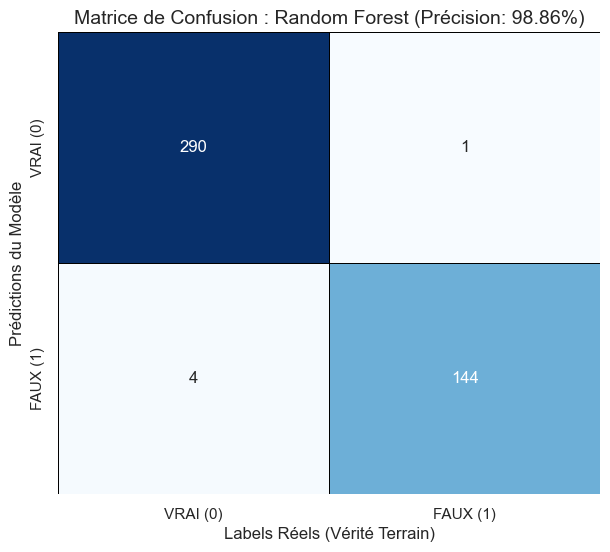

In [226]:
cm = np.array([[290, 1], 
               [4, 144]])

# Calcul de la précision pour le titre
precision_globale = (cm[0, 0] + cm[1, 1]) / cm.sum()
precision_texte = f"{precision_globale:.2%}" # Affiche 98.86%

labels_axes = ['VRAI (0)', 'FAUX (1)']

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    linewidths=0.5,
    linecolor='black',
    xticklabels=labels_axes,
    yticklabels=labels_axes
)

# TITRE CORRIGÉ qui intègre la précision
plt.title(f'Matrice de Confusion : Random Forest (Précision: {precision_texte})', fontsize=14)
plt.xlabel('Labels Réels (Vérité Terrain)', fontsize=12)
plt.ylabel('Prédictions du Modèle', fontsize=12)

plt.show()